Guide to adding layers

In [1]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(256, 256,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))
print(model.summary())

NameError: name 'keras' is not defined

In [48]:
import os
import math
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU

In [3]:
BASE_DIR = 'Chosen class balanced/'
names = ["Cardboard boxes","Cardboard drinks","glass","Metal cans","Metal foils and container","paper","Plastic bottles"]

tf.random.set_seed(1)

In [4]:
# Reorganize the folder structure:
if not os.path.isdir(BASE_DIR + 'train/'):
    for name in names:
        os.makedirs(BASE_DIR + 'train/' + name)
        os.makedirs(BASE_DIR + 'val/' + name)
        os.makedirs(BASE_DIR + 'test/' + name)

In [6]:
# Moce the image files
orig_folders = ["Cardboard boxes/","Cardboard drinks/","glass/","Metal cans/","Metal foils and container/","paper/","Plastic bottles/"]
for folder_idx, folder in enumerate(orig_folders):
    files = os.listdir(BASE_DIR + folder)
    number_of_images = len([name for name in files])
    n_train = int((number_of_images * 0.6) + 0.5) #set 60% for training
    n_valid = int((number_of_images*0.25) + 0.5) #set 25% for validation
    n_test = number_of_images - n_train - n_valid #set 15% for test
    print(number_of_images, n_train, n_valid, n_test)
    for idx, file in enumerate(files):
        file_name = BASE_DIR + folder + file
        if idx < n_train:
            shutil.move(file_name, BASE_DIR + "train/" + names[folder_idx])
        elif idx < n_train + n_valid:
            shutil.move(file_name, BASE_DIR + "val/" + names[folder_idx])
        else:
            shutil.move(file_name, BASE_DIR + "test/" + names[folder_idx])

500 300 125 75
500 300 125 75
500 300 125 75
500 300 125 75
500 300 125 75
500 300 125 75
500 300 125 75


In [23]:
# get the preprocessing function of this model
preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input

In [24]:
# Generate batches of tensor image data with real-time data augmentation.

train_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

train_batches = train_gen.flow_from_directory(
    'Chosen class balanced/train',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_batches = valid_gen.flow_from_directory(
    'Chosen class balanced/val',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

test_batches = test_gen.flow_from_directory(
    'Chosen class balanced/test',
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=1,
    shuffle=False,
    color_mode="rgb",
    classes=names
)



Found 2100 images belonging to 7 classes.
Found 875 images belonging to 7 classes.
Found 525 images belonging to 7 classes.


In [93]:
mobileNetv1_model = tf.keras.applications.MobileNet()
print(type(mobileNetv1_model))
mobileNetv1_model.summary()

# try out different ones, e.g. MobileNetV2
#tl_model = tf.keras.applications.MobileNetV2()
#print(type(tl_model))
#tl_model.summary()

<class 'keras.src.engine.functional.Functional'>
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 

 conv_dw_8 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9

In [109]:
# convert to Sequential model, omit the last layer
# this works with VGG16 because the structure is linear
model = keras.models.Sequential()
for layer in mobileNetv1_model.layers[0:-1]:
    model.add(layer)

In [110]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128       
 zation)                                                         
                                                      

 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_9

In [111]:
# set trainable=False for all layers
# we don't want to train them again
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128       
 zation)                                                         
                                                      

 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_9

In [113]:
# add a last classification layer for our use case with 5 classes
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(7))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128       
 zation)                                                         
                                                      

 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )                                                               
                                                                 
 conv_dw_9

In [114]:
# loss and optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [115]:
epochs = 30

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=2,
    start_from_epoch=0
)
#tf.keras.callbacks.EarlyStopping(
#    monitor='val_loss',
#    min_delta=0,
#    patience=0,
#    verbose=0,
#    mode='auto',
#    baseline=None,
#    restore_best_weights=False,

model.fit(train_batches, validation_data=val_batches,
            callbacks=[early_stopping],
          epochs=epochs, verbose=1)

Epoch 1/30
  3/525 [..............................] - ETA: 36s - loss: 2.2895 - accuracy: 0.1667     

C:\Users\Amirul\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


525/525 [==============================] - 60s 111ms/step - loss: 1.2596 - accuracy: 0.5243 - val_loss: 1.0692 - val_accuracy: 0.6240
Epoch 2/30
525/525 [==============================] - 57s 108ms/step - loss: 0.9083 - accuracy: 0.6638 - val_loss: 1.1631 - val_accuracy: 0.5989
Epoch 3/30
525/525 [==============================] - 59s 113ms/step - loss: 0.7968 - accuracy: 0.7086 - val_loss: 1.0728 - val_accuracy: 0.6229
Epoch 4/30
525/525 [==============================] - 59s 112ms/step - loss: 0.7468 - accuracy: 0.7310 - val_loss: 0.9117 - val_accuracy: 0.6937
Epoch 5/30
525/525 [==============================] - 60s 114ms/step - loss: 0.6860 - accuracy: 0.7500 - val_loss: 1.0980 - val_accuracy: 0.6343
Epoch 6/30
525/525 [==============================] - 59s 113ms/step - loss: 0.6263 - accuracy: 0.7643 - val_loss: 0.9391 - val_accuracy: 0.7086
Epoch 7/30
525/525 [==============================] - 58s 111ms/step - loss: 0.5771 - accuracy: 0.7795 - val_loss: 0.9452 - val_accuracy: 0.6

In [116]:
model.evaluate(test_batches, verbose=1)

525/525 [==============================] - 10s 18ms/step - loss: 0.8617 - accuracy: 0.7105


[0.8617426156997681, 0.7104762196540833]

In [117]:
model.save("MobileNetV1_64relu_30relu_30relu_7L_BD500.keras") #saving trained model

In [118]:
loadmodel=tf.keras.models.load_model("MobileNetV1_64relu_30relu_7L_BD500.keras")

In [119]:
# make some predictions

predictions = loadmodel.predict(test_batches)
predictions = tf.nn.softmax(predictions)
labels = np.argmax(predictions, axis=1)

525/525 [==============================] - 10s 18ms/step


In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
import seaborn as sns

Classes = ["Cardboard boxes","Cardboard drinks","glass","Metal cans","Metal foils and container","paper","Plastic bottles"]


def plot2(y_actual,y_true):

    column=[f'Predicted {label}'for label in Classes]
    indices=[f'Actual {label}' for label in Classes]
    table=pd.DataFrame(confusion_matrix(y_actual,y_result),
                       columns=column,index=indices)

    
    return sns.heatmap(table,annot=True,fmt='d',cmap='Blues') 
    
y_actual=test_batches.labels
y_result=labels

<Axes: >

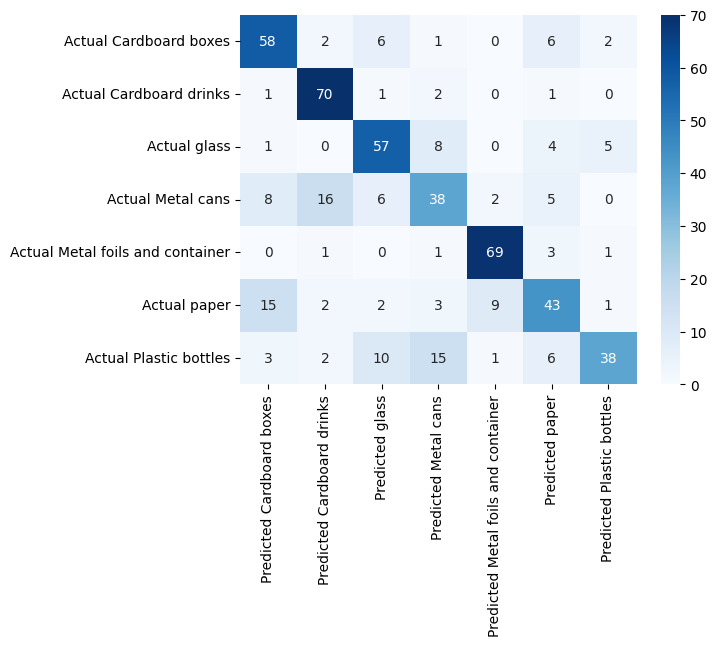

In [121]:
plot2(y_actual,y_result)

In [122]:
#Confusion matrix report

matrix=classification_report(y_actual,y_result)
print('Classification report: \n',matrix)

Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.77      0.72        75
           1       0.75      0.93      0.83        75
           2       0.70      0.76      0.73        75
           3       0.56      0.51      0.53        75
           4       0.85      0.92      0.88        75
           5       0.63      0.57      0.60        75
           6       0.81      0.51      0.62        75

    accuracy                           0.71       525
   macro avg       0.71      0.71      0.70       525
weighted avg       0.71      0.71      0.70       525



In [123]:
modelname='MobileNetV1_64relu_30relu_30relu_7L_BD500_summary.txt'
def myprint(s):
    with open(modelname,'a') as f:
        print(s, file=f)

loadmodel.summary(print_fn=myprint)

file2write=open(modelname,'a')
file2write.write(matrix)
file2write.close()

In [124]:
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix = confusion_matrix(y_actual,y_result)

# Labeling the rows and columns
classes = ["0","1","2","3","4","5","6"]
conf_matrix_labeled = np.vstack((np.array([""] + classes), np.column_stack((np.array(classes), conf_matrix))))

# Convert the confusion matrix to a formatted string
conf_matrix_text = "Confusion Matrix:\n" + str(conf_matrix)

# Specify the path of the summary text file
summary_file_path = modelname

# Read the content of the summary file
with open(summary_file_path, 'r') as summary_file:
    summary_content = summary_file.read()
additional_text = "\nClasses :\n Cardboard boxes=0\n Cardboard drinks=1\n glass=2\n Metal cans=3\n Metal foils and container=4\n paper=5\n Plastic bottles=6"
# Append the confusion matrix content to the summary content
combined_content = summary_content + '\n\n' + conf_matrix_text + '\n\n'+additional_text

# Write the combined content back to the summary file
with open(summary_file_path, 'w') as summary_file:
    summary_file.write(combined_content)

print(f"Confusion matrix added to {summary_file_path}")

Confusion matrix added to MobileNetV1_64relu_30relu_30relu_7L_BD500_summary.txt
